## Date Related Feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("online_retail_II.xlsx")

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.shape

(525461, 8)

In [5]:
data["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [6]:
data["date"] = pd.to_datetime(data["InvoiceDate"])
data[["date","InvoiceDate"]].head()

,date,InvoiceDate
0,2009-12-01 07:45:00,2009-12-01 07:45:00
1,2009-12-01 07:45:00,2009-12-01 07:45:00
2,2009-12-01 07:45:00,2009-12-01 07:45:00
3,2009-12-01 07:45:00,2009-12-01 07:45:00
4,2009-12-01 07:45:00,2009-12-01 07:45:00


In [7]:
data[["date","InvoiceDate"]].dtypes

,0
date,datetime64[ns]
InvoiceDate,datetime64[ns]


## Engineering Date Features

In [17]:
# extract date
data["date_part"] = data["date"].dt.date
data[["date","date_part"]].head()

,date,date_part
0,2009-12-01 07:45:00,2009-12-01
1,2009-12-01 07:45:00,2009-12-01
2,2009-12-01 07:45:00,2009-12-01
3,2009-12-01 07:45:00,2009-12-01
4,2009-12-01 07:45:00,2009-12-01


In [18]:
# extract time
data["time_part"] = data["date"].dt.time
data[["date","time_part"]].head()

,date,time_part
0,2009-12-01 07:45:00,07:45:00
1,2009-12-01 07:45:00,07:45:00
2,2009-12-01 07:45:00,07:45:00
3,2009-12-01 07:45:00,07:45:00
4,2009-12-01 07:45:00,07:45:00


In [19]:
# extract year
data["year"] = data["date"].dt.year
data[["date","year"]].head()

,date,year
0,2009-12-01 07:45:00,2009
1,2009-12-01 07:45:00,2009
2,2009-12-01 07:45:00,2009
3,2009-12-01 07:45:00,2009
4,2009-12-01 07:45:00,2009


In [24]:
data["year"].unique()

array([2009, 2010], dtype=int32)

In [20]:
# is the date is start or end of the year ?
data["is_year_start"] = data["date"].dt.is_year_start.astype(int)
data["is_year_end"] = data["date"].dt.is_year_end.astype(int)

data[["date","is_year_start","is_year_end"]].head()

,date,is_year_start,is_year_end
0,2009-12-01 07:45:00,0,0
1,2009-12-01 07:45:00,0,0
2,2009-12-01 07:45:00,0,0
3,2009-12-01 07:45:00,0,0
4,2009-12-01 07:45:00,0,0


In [13]:
data["is_year_start"].unique()

array([0])

In [14]:
data["is_year_end"].unique()

array([0])

In [21]:
# is leap year ?
data["is_leap_year"] = data["date"].dt.is_leap_year.astype(int)
data[["year","is_leap_year"]].head()

,year,is_leap_year
0,2009,0
1,2009,0
2,2009,0
3,2009,0
4,2009,0


In [22]:
data["is_leap_year"].unique() # no year in the data set is leap year

array([0])

In [27]:
# extract quarter
data["quarter"] = data["date"].dt.quarter
data[["date","quarter"]].head()

,date,quarter
0,2009-12-01 07:45:00,4
1,2009-12-01 07:45:00,4
2,2009-12-01 07:45:00,4
3,2009-12-01 07:45:00,4
4,2009-12-01 07:45:00,4


In [28]:
data["quarter"].unique()

array([4, 1, 2, 3], dtype=int32)

In [29]:
# quarter start or end
data["is_quarter_start"] = data["date"].dt.is_quarter_start.astype(int)
data["is_quarter_end"] = data["date"].dt.is_quarter_end.astype(int)

In [30]:
data[["date","is_quarter_start","is_quarter_end"]].head()

,date,is_quarter_start,is_quarter_end
0,2009-12-01 07:45:00,0,0
1,2009-12-01 07:45:00,0,0
2,2009-12-01 07:45:00,0,0
3,2009-12-01 07:45:00,0,0
4,2009-12-01 07:45:00,0,0


In [32]:
data["is_quarter_start"].unique()

array([0, 1])

In [33]:
data[data["is_quarter_start"]==1].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,invoice_year_start,...,is_year_start,is_year_end,is_leap_year,date_part,time_part,year,`quarter`,quarter,is_quarter_start,is_quarter_end
147682,503430,21523,DOOR MAT FANCY FONT HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,False,...,0,0,0,2010-04-01,07:49:00,2010,2,2,1,0
147683,503430,21524,DOOR MAT SPOTTY HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,False,...,0,0,0,2010-04-01,07:49:00,2010,2,2,1,0
147684,503430,48116,DOOR MAT MULTICOLOUR STRIPE,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,False,...,0,0,0,2010-04-01,07:49:00,2010,2,2,1,0
147685,503430,48129,DOOR MAT TOPIARY,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,False,...,0,0,0,2010-04-01,07:49:00,2010,2,2,1,0
147686,503430,48187,DOOR MAT NEW ENGLAND,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,False,...,0,0,0,2010-04-01,07:49:00,2010,2,2,1,0


In [34]:
# extract semester from the quarter information
data["semester"] = np.where(data["quarter"].isin([1,2]),1,2)
data[["quarter","semester"]].head()

,quarter,semester
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2


In [35]:
data["semester"].unique()

array([2, 1])

In [36]:
# extract month
data["month"] = data["date"].dt.month
data[["date","month"]].head()

,date,month
0,2009-12-01 07:45:00,12
1,2009-12-01 07:45:00,12
2,2009-12-01 07:45:00,12
3,2009-12-01 07:45:00,12
4,2009-12-01 07:45:00,12


In [37]:
data["month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [39]:
# days in month
data["days_in_month"] = data["date"].dt.days_in_month
data[["date","days_in_month","month"]].head()

,date,days_in_month,month
0,2009-12-01 07:45:00,31,12
1,2009-12-01 07:45:00,31,12
2,2009-12-01 07:45:00,31,12
3,2009-12-01 07:45:00,31,12
4,2009-12-01 07:45:00,31,12


In [41]:
data["days_in_month"].unique()

array([31, 28, 30], dtype=int32)

In [42]:
# month start or end
data["is_month_start"] = data["date"].dt.is_month_start.astype(int)
data["is_month_end"] = data["date"].dt.is_month_end.astype(int)

In [43]:
data[["month","is_month_start","is_month_end"]].head()

,month,is_month_start,is_month_end
0,12,1,0
1,12,1,0
2,12,1,0
3,12,1,0
4,12,1,0


In [44]:
# exact week of the year
data["week_of_year"] = data["date"].dt.isocalendar().week
data[["date","week_of_year"]].head()

,date,week_of_year
0,2009-12-01 07:45:00,49
1,2009-12-01 07:45:00,49
2,2009-12-01 07:45:00,49
3,2009-12-01 07:45:00,49
4,2009-12-01 07:45:00,49


In [45]:
# exact day
data["day"] = data["date"].dt.day
data[["date","day"]].head()

,date,day
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [46]:
# day of week
data["day_of_week"] = data["date"].dt.dayofweek
data[["date","day_of_week"]].head()

,date,day_of_week
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [47]:
data["day_of_week"].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int32)

In [52]:
# weekend ?
data["is_weekend"] = data["date"].dt.dayofweek > 4
data["is_weekend"] = data["is_weekend"].astype(int)
data[["date","is_weekend"]].head()

,date,is_weekend
0,2009-12-01 07:45:00,0
1,2009-12-01 07:45:00,0
2,2009-12-01 07:45:00,0
3,2009-12-01 07:45:00,0
4,2009-12-01 07:45:00,0


In [53]:
data['is_weekend'].unique()

array([0, 1])

In [54]:
# day of year
data["invoice_day_year"] = data["date"].dt.dayofyear
data[["date", "invoice_day_year"]].head()

,date,invoice_day_year
0,2009-12-01 07:45:00,335
1,2009-12-01 07:45:00,335
2,2009-12-01 07:45:00,335
3,2009-12-01 07:45:00,335
4,2009-12-01 07:45:00,335


## Time Related Feature

In [56]:
data = pd.read_excel("online_retail_II.xlsx")

In [58]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [59]:
# extract time
data["time_part"] = data["InvoiceDate"].dt.time
data[["InvoiceDate","time_part"]].head()

,InvoiceDate,time_part
0,2009-12-01 07:45:00,07:45:00
1,2009-12-01 07:45:00,07:45:00
2,2009-12-01 07:45:00,07:45:00
3,2009-12-01 07:45:00,07:45:00
4,2009-12-01 07:45:00,07:45:00


In [60]:
# extract hour,min,second
data["hour"] = data["time_part"].apply(lambda x: x.hour)
data["minute"] = data["time_part"].apply(lambda x: x.minute)
data["second"] = data["time_part"].apply(lambda x: x.second)
data[["time_part","hour","minute","second"]].head()

,time_part,hour,minute,second
0,07:45:00,7,45,0
1,07:45:00,7,45,0
2,07:45:00,7,45,0
3,07:45:00,7,45,0
4,07:45:00,7,45,0


## Working with different timezone

In [67]:
df = pd.DataFrame()
df["time"] = pd.concat(
    [
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="H", periods=3, tz="Europe/Berlin"
            )
        ),
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="H", periods=3, tz="US/Central"
            )
        ),
    ],
    axis=0,
)

<ipython-input-67-09378ca8bd61>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(
<ipython-input-67-09378ca8bd61>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(


In [68]:
df

,time
0,2014-08-01 09:00:00+02:00
1,2014-08-01 10:00:00+02:00
2,2014-08-01 11:00:00+02:00
0,2014-08-01 09:00:00-05:00
1,2014-08-01 10:00:00-05:00
2,2014-08-01 11:00:00-05:00


In [69]:
df["time_utc"] = pd.to_datetime(df["time"], utc=True)
df["time_India"] = df["time_utc"].dt.tz_convert("Asia/Kolkata")
df

,time,time_utc,time_India
0,2014-08-01 09:00:00+02:00,2014-08-01 07:00:00+00:00,2014-08-01 12:30:00+05:30
1,2014-08-01 10:00:00+02:00,2014-08-01 08:00:00+00:00,2014-08-01 13:30:00+05:30
2,2014-08-01 11:00:00+02:00,2014-08-01 09:00:00+00:00,2014-08-01 14:30:00+05:30
0,2014-08-01 09:00:00-05:00,2014-08-01 14:00:00+00:00,2014-08-01 19:30:00+05:30
1,2014-08-01 10:00:00-05:00,2014-08-01 15:00:00+00:00,2014-08-01 20:30:00+05:30
2,2014-08-01 11:00:00-05:00,2014-08-01 16:00:00+00:00,2014-08-01 21:30:00+05:30


## Mixed Variable

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
! wget https://raw.githubusercontent.com/solegalli/feature-engineering-for-machine-learning/refs/heads/main/Datasets/sample_s2.csv

--2025-03-11 14:17:22--  https://raw.githubusercontent.com/solegalli/feature-engineering-for-machine-learning/refs/heads/main/Datasets/sample_s2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9534894 (9.1M) [text/plain]
Saving to: ‘sample_s2.csv’

sample_s2.csv       100%[===================>]   9.09M  --.-KB/s    in 0.06s   

2025-03-11 14:17:23 (161 MB/s) - ‘sample_s2.csv’ saved [9534894/9534894]



In [72]:
data = pd.read_csv("sample_s2.csv")

In [73]:
data.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [74]:
data['open_il_24m'].unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

Text(0, 0.5, 'Number of borrowers')

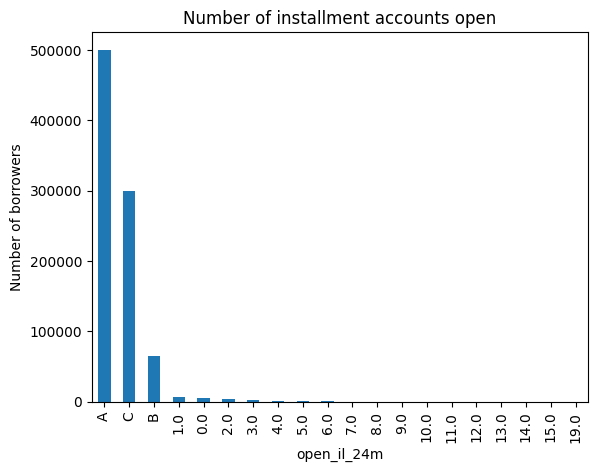

In [75]:
fig = data['open_il_24m'].value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

In [76]:
# extract numerical and categorical features
data['open_il_24m_numerical'] = pd.to_numeric(data["open_il_24m"],errors='coerce',downcast='integer')
data['open_il_24m_categorical'] = np.where(data['open_il_24m_numerical'].isnull(),data['open_il_24m'],np.nan)

In [77]:
data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


In [79]:
# drop numercal NaN values
data.dropna(subset = ['open_il_24m_numerical'], axis=0).head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
466285,68444620,0.0,0.0,NaN
466286,68547583,1.0,1.0,NaN
466287,67849662,0.0,0.0,NaN
466288,68506885,2.0,2.0,NaN
466289,68341763,4.0,4.0,NaN


In [80]:
data.isnull().sum()

,0
id,0
open_il_24m,0
open_il_24m_numerical,866007
open_il_24m_categorical,21372


In [81]:
data = pd.read_csv('titanic.csv', usecols=['ticket', 'cabin', 'survived'])
data.head()

,survived,ticket,cabin
0,1,24160,B5
1,1,113781,C22
2,0,113781,C22
3,0,113781,C22
4,0,113781,C22


In [82]:
len(data['cabin'].unique()),len(data['ticket'].unique())

(182, 929)

In [83]:
data['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

In [87]:
data['ticket_num'] = data['ticket'].apply(lambda s: s.split()[-1])
data['ticket_num'] = pd.to_numeric(data['ticket_num'],errors='coerce',downcast='integer')
data['ticket_cat'] = data['ticket'].apply(lambda s: s.split()[0])
data['ticket_cat'] = np.where(data['ticket_cat'].str.isdigit(), np.nan,data['ticket_cat'])

data[['ticket', 'ticket_num', 'ticket_cat']].head(20)

,ticket,ticket_num,ticket_cat
0,24160,24160.0,NaN
1,113781,113781.0,NaN
2,113781,113781.0,NaN
3,113781,113781.0,NaN
4,113781,113781.0,NaN
5,19952,19952.0,NaN
6,13502,13502.0,NaN
7,112050,112050.0,NaN
8,11769,11769.0,NaN
9,PC 17609,17609.0,PC


In [88]:
data['ticket_cat'].unique()

array([nan, 'PC', 'W.E.P.', 'WE/P', 'F.C.', 'P/PP', 'C.A.', 'C.A./SOTON',
       'S.O.P.', 'F.C.C.', 'SC/AH', 'W./C.', 'S.O.C.', 'SC/PARIS',
       'S.W./PP', 'W/C', 'SCO/W', 'SO/C', 'SC/Paris', 'SC', 'S.O./P.P.',
       'S.C./PARIS', 'SC/A.3', 'SW/PP', 'CA', 'SOTON/O2', 'C',
       'SOTON/O.Q.', 'A/4', 'PP', 'A/5', 'A./5.', 'A/5.', 'SOTON/OQ',
       'S.P.', 'SC/A4', 'AQ/3.', 'STON/O2.', 'A.', 'LINE', 'STON/O',
       'AQ/4', 'A/S', 'A.5.', 'A4.', 'A/4.', 'Fa', 'S.C./A.4.', 'LP',
       'CA.', 'STON/OQ.'], dtype=object)

In [90]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [91]:
data['cabin_num'] = data['cabin'].str.extract('(\d+)')
data['cabin_cat'] = data['cabin'].str[0]
data[['cabin', 'cabin_num', 'cabin_cat']].head()

,cabin,cabin_num,cabin_cat
0,B5,5,B
1,C22,22,C
2,C22,22,C
3,C22,22,C
4,C22,22,C
